In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [27]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                        revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"]
                      )

In [30]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue,revenue_per_night
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,476.3,95.26
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,333.0,66.60
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,NaN
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,300.0,60.00
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,NaN


In [33]:
agg_hotels = hotels.groupby("Nationality").agg(
        total_revenue = ("total_revenue", "sum"),
        avg_revenue = ("total_revenue", "mean"),
        avg_age = ("Age", "mean"),
        avg_nights = ("RoomNights", "mean"),
        avg_nightly_revenue = ("revenue_per_night", "mean")
)

Text(0, 0.5, 'Avg. Revenue Per Customer')

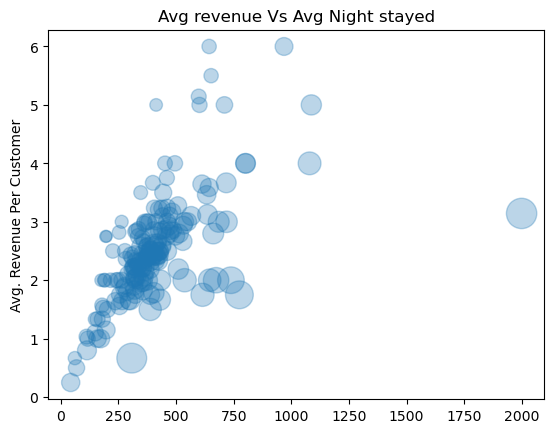

In [39]:
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels["avg_revenue"],
    agg_hotels["avg_nights"],
    s = agg_hotels["avg_nightly_revenue"],
    alpha=.3
);

ax.set_title("Avg revenue Vs Avg Night stayed");
ax.set_ylabel("Avg. Night stayed");
ax.set_ylabel("Avg. Revenue Per Customer")

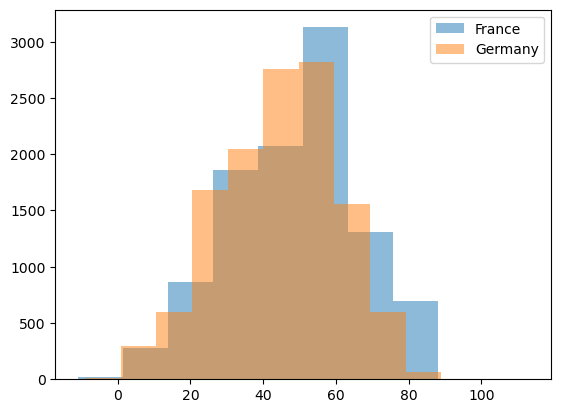

In [26]:
fig, ax = plt.subplots()


ax.hist(
    hotels.loc[hotels["Nationality"]=="DEU", ["Age"]],
    alpha=.5
)
ax.hist(
    hotels.loc[hotels["Nationality"]=="FRA", ["Age"]],
    alpha=.5
)


ax.legend(["France", "Germany"])